In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
bike_racks = gpd.read_file('../data/BikeRacks.shp')
print(bike_racks.crs)
bike_racks.head()

epsg:2274


,OBJECTID,Type,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry
0,1,Rack,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept,POINT (1774741.547 625500.431)
1,2,Rack,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept,POINT (1781383.854 674730.143)
2,3,Rack,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept,POINT (1785273.849 664927.568)
3,4,Rack,Public,Existing,115,1,Park/Greenway,5,-86.686526,36.187547,"Two Rivers Golf Course, Stones River Greenway ...",Health Dept,POINT (1765907.581 675659.727)
4,5,Rack,Public,Existing,103,3,Park/Community Center,15,-86.762180,36.172455,East Park & Community Center,Health Dept,POINT (1743539.836 670331.347)


In [3]:
type(bike_racks)

geopandas.geodataframe.GeoDataFrame

In [4]:
bike_racks.crs


<Projected CRS: EPSG:2274>
Name: NAD83 / Tennessee (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Tennessee
- bounds: (-90.31, 34.98, -81.65, 36.68)
Coordinate Operation:
- name: SPCS83 Tennessee zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [5]:
bike_racks.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    430 non-null    int64   
 1   Type        430 non-null    object  
 2   Domain      430 non-null    object  
 3   Status      430 non-null    object  
 4   IDNumber    430 non-null    int64   
 5   Quantity    430 non-null    int64   
 6   Location    430 non-null    object  
 7   Capacity    430 non-null    int64   
 8   LON         426 non-null    float64 
 9   LAT         426 non-null    float64 
 10  Detail_Loc  430 non-null    object  
 11  Data_Colle  430 non-null    object  
 12  geometry    430 non-null    geometry
dtypes: float64(2), geometry(1), int64(4), object(6)
memory usage: 43.8+ KB


In [6]:
bike_racks.geometry = bike_racks.geometry.to_crs('EPSG:4326')
#bike_racks['geometry'] = bike_racks['geometry'].to_crs('EPSG:4326')

In [7]:
bike_racks.head()

,OBJECTID,Type,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry
0,1,Rack,Public,Existing,113,1,Mall,12,-86.655453,36.049928,Hickory Hollow Mall,Health Dept,POINT (-86.65545 36.04993)
1,2,Rack,Public,Existing,114,2,Greenway,4,-86.634063,36.185280,Stones River Greenway - Donelson/Hermitage Area,Health Dept,POINT (-86.63406 36.18528)
2,3,Rack,Public,Proposed,256,0,Park/Greenway,0,-86.620671,36.158422,"Percy Priest Reservoir, Stones River Greenway",Health Dept,POINT (-86.62067 36.15842)
3,4,Rack,Public,Existing,115,1,Park/Greenway,5,-86.686526,36.187547,"Two Rivers Golf Course, Stones River Greenway ...",Health Dept,POINT (-86.68653 36.18755)
4,5,Rack,Public,Existing,103,3,Park/Community Center,15,-86.762180,36.172455,East Park & Community Center,Health Dept,POINT (-86.76218 36.17245)


<AxesSubplot:>

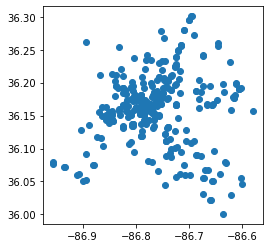

In [8]:
bike_racks.plot()

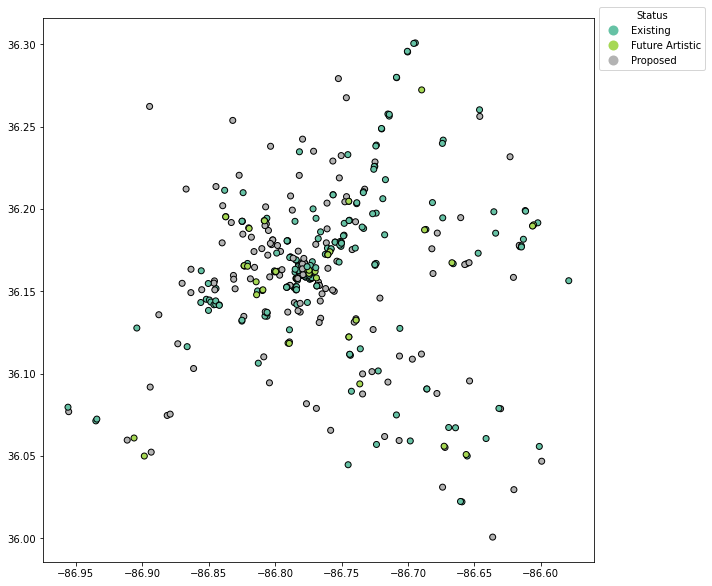

In [9]:
leg_kwds = {'title': 'Status', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 1}

bike_racks.plot(column = 'Status', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [10]:
neighborhoods = gpd.read_file('../data/Neighborhood_Boundary_Geographic.shp')
neighborhoods

,NAME,geometry
0,Historic Buena Vista,"POLYGON ((-86.79511 36.17576, -86.79403 36.176..."
1,Charlotte Park,"POLYGON ((-86.87460 36.15758, -86.87317 36.157..."
2,Hillwood,"POLYGON ((-86.87614 36.13554, -86.87583 36.135..."
3,West Meade,"POLYGON ((-86.90384 36.12554, -86.90328 36.125..."
4,White Bridge,"POLYGON ((-86.86321 36.12886, -86.86321 36.128..."
...,...,...
283,River Plantation III,"POLYGON ((-86.94600 36.06871, -86.94605 36.068..."
284,Porter Heights,"POLYGON ((-86.70929 36.18842, -86.70942 36.187..."
285,Avondale Park,"POLYGON ((-86.98693 36.07718, -86.98672 36.077..."
286,Travis Trace,"POLYGON ((-87.01880 36.08394, -87.01866 36.083..."


<AxesSubplot:>

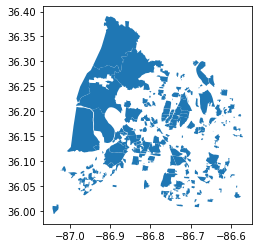

In [11]:
neighborhoods.plot()

In [12]:
bikeracks_by_neighborhood = gpd.sjoin(bike_racks, neighborhoods, op = 'within')

In [13]:
bikeracks_by_neighborhood.head()

,OBJECTID,Type,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry,index_right,NAME
4,5,Rack,Public,Existing,103,3,Park/Community Center,15,-86.762180,36.172455,East Park & Community Center,Health Dept,POINT (-86.76218 36.17245),15,Historic Edgefield
111,112,Rack,Public,Proposed,312,0,Elementary School,0,-86.760319,36.172222,Warner Elementary School,Health Dept,POINT (-86.76032 36.17222),15,Historic Edgefield
393,394,Rack,Public,Future Artistic,415,0,Park,0,-86.758720,36.174016,East Park - Woodland St @ S 8th St,Civic,POINT (-86.75872 36.17401),15,Historic Edgefield
394,395,Rack,Public,Future Artistic,416,0,Park,0,-86.760313,36.172288,East Park - Warner Public School Entrance,Civic,POINT (-86.76031 36.17229),15,Historic Edgefield
395,396,Rack,Public,Future Artistic,417,0,Park,0,-86.760265,36.172210,East Park - Warner Public School Entrance,Civic,POINT (-86.76027 36.17221),15,Historic Edgefield


In [14]:
bikeracks_by_neighborhood = bikeracks_by_neighborhood.rename(columns = {'NAME' : 'nhood'})
bikeracks_by_neighborhood.head()

,OBJECTID,Type,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry,index_right,nhood
4,5,Rack,Public,Existing,103,3,Park/Community Center,15,-86.762180,36.172455,East Park & Community Center,Health Dept,POINT (-86.76218 36.17245),15,Historic Edgefield
111,112,Rack,Public,Proposed,312,0,Elementary School,0,-86.760319,36.172222,Warner Elementary School,Health Dept,POINT (-86.76032 36.17222),15,Historic Edgefield
393,394,Rack,Public,Future Artistic,415,0,Park,0,-86.758720,36.174016,East Park - Woodland St @ S 8th St,Civic,POINT (-86.75872 36.17401),15,Historic Edgefield
394,395,Rack,Public,Future Artistic,416,0,Park,0,-86.760313,36.172288,East Park - Warner Public School Entrance,Civic,POINT (-86.76031 36.17229),15,Historic Edgefield
395,396,Rack,Public,Future Artistic,417,0,Park,0,-86.760265,36.172210,East Park - Warner Public School Entrance,Civic,POINT (-86.76027 36.17221),15,Historic Edgefield


In [15]:
bikeracks_by_neighborhood['nhood'].value_counts()



Urban Residents                 51
Sylvan Park                     10
Hillsboro-West End               9
Nations                          6
Lockeland Springs                6
Woodbine                         6
Edgehill (ONE)                   6
Historic Edgefield               5
Bordeaux                         4
Germantown                       4
Glencliff                        4
Sunnyside                        4
Inglewood                        3
Capitol View                     3
Eastwood                         3
Historic Buena Vista             3
Shelby Hills                     2
Rosebank                         2
Priest Lake Meadows              2
Jackson Park                     2
Maxwell Heights                  2
Chestnut Hill (TAG)              2
Historic Old Hickory Village     2
Napier Area                      2
Greenwood                        2
McFerrin Park                    2
Neighbors of Antioch             2
Hillwood                         2
Buena Vista         

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

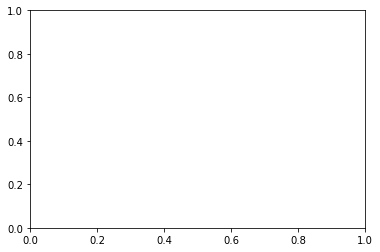

In [16]:
plt.subplots()

In [17]:
top10 = ['Urban Residents', 'Sylvan Park', 'Hillsboro-West End', 'Woodbine', 'Lockeland Springs', 'Nations', 'Edgehill (ONE)', 'Historic Edgewood', 'Germantown', 'Bordeaux']

In [18]:
bikes_in_top_nhoods = bikeracks_by_neighborhood.query("nhood in @top10")
bikes_in_top_nhoods['nhood'].value_counts().reset_index()


,index,nhood
0,Urban Residents,51
1,Sylvan Park,10
2,Hillsboro-West End,9
3,Woodbine,6
4,Edgehill (ONE),6
5,Nations,6
6,Lockeland Springs,6
7,Germantown,4
8,Bordeaux,4


In [19]:
bikes_in_top_nhoods.head()

,OBJECTID,Type,Domain,Status,IDNumber,Quantity,Location,Capacity,LON,LAT,Detail_Loc,Data_Colle,geometry,index_right,nhood
9,10,Rack,Public,Future Artistic,83,0,Bus Stop,0,-86.779955,36.163372,"Bus Stop; Church St at 5th Ave N, Fifth Third ...",Health Dept,POINT (-86.77995 36.16337),41,Urban Residents
10,11,Rack,Public,Existing,57,1,Bus Stop,2,-86.779740,36.163455,"Bus Stop; Church St at 5th Ave N, Fifth Third ...",Health Dept,POINT (-86.77974 36.16345),41,Urban Residents
11,12,Rack,Public,Existing,119,2,Library,4,-86.781516,36.162350,Downtown Nashville Public Library,Health Dept,POINT (-86.78152 36.16235),41,Urban Residents
12,13,Rack,Public,Proposed,258,0,Bus Stop,0,-86.776235,36.163284,Bus Stop; Commerce St at 2nd Ave N - 2nd Ave...,Health Dept,POINT (-86.77623 36.16328),41,Urban Residents
13,14,Rack,Public,Future Artistic,259,0,Bus Stop,0,-86.776088,36.163139,Bus Stop; Commerce St at 2nd Ave N - 2nd Ave...,Health Dept,POINT (-86.77609 36.16314),41,Urban Residents


In [20]:
top_nhoods = neighborhoods.query("NAME in @top10")
top_nhoods

,NAME,geometry
10,Woodbine,"POLYGON ((-86.75227 36.12578, -86.75088 36.125..."
13,Lockeland Springs,"POLYGON ((-86.73931 36.18365, -86.73931 36.183..."
19,Sylvan Park,"POLYGON ((-86.83557 36.15231, -86.83545 36.152..."
41,Urban Residents,"POLYGON ((-86.78122 36.16457, -86.78205 36.165..."
58,Bordeaux,"POLYGON ((-86.84627 36.18296, -86.84624 36.182..."
189,Hillsboro-West End,"POLYGON ((-86.82511 36.13450, -86.82430 36.134..."
210,Germantown,"POLYGON ((-86.78312 36.18338, -86.78310 36.183..."
224,Edgehill (ONE),"POLYGON ((-86.78952 36.15104, -86.78873 36.150..."
241,Nations,"POLYGON ((-86.85708 36.17187, -86.85677 36.171..."


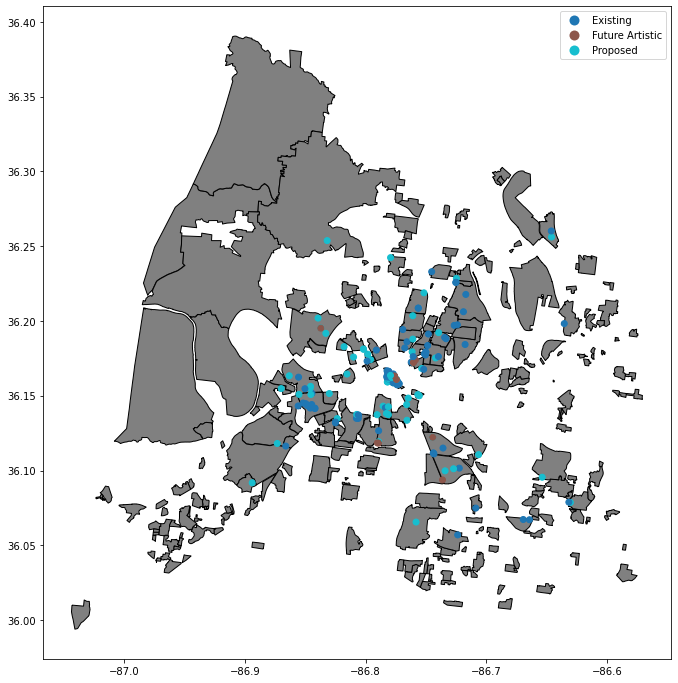

In [21]:
#fig, ax = plt.subplots()
ax = neighborhoods.plot(figsize=(12,12), color = 'grey', edgecolor = "black")
bikeracks_by_neighborhood.plot(ax = ax, column = 'Status', legend = True)
plt.show();

In [22]:
top_nhoods.geometry.centroid

<ipython-input-22-ed1b87ced28b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  top_nhoods.geometry.centroid


10     POINT (-86.73773 36.11716)
13     POINT (-86.74161 36.17759)
19     POINT (-86.84267 36.14404)
41     POINT (-86.77756 36.16128)
58     POINT (-86.84537 36.19417)
189    POINT (-86.81185 36.13051)
210    POINT (-86.78766 36.17843)
224    POINT (-86.78575 36.14222)
241    POINT (-86.85394 36.16166)
dtype: geometry

In [23]:
center = top_nhoods.geometry.centroid[10]
print(center)


POINT (-86.73772574011852 36.11715502425022)


<ipython-input-23-2ba0e5a11831>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = top_nhoods.geometry.centroid[10]


In [24]:
area_center = [center.y, center.x]

In [25]:
area_center

[36.11715502425022, -86.73772574011852]

In [26]:
map_nhood = folium.Map(location = area_center, zoom_start = 12)
map_nhood

map_nhood = folium.Map(location = area_center, zoom_start = 12)

folium.GeoJson(
    top_nhoods,
    style_function=lambda feature: {
        "fillColor": feature['properties']['colors']
    }
).add_to(map_nhood)



In [27]:
grouped_nhoods = bikes_in_top_nhoods.groupby('nhood').count()

In [28]:
grouped_nhoods = grouped_nhoods.reset_index()[['nhood', 'OBJECTID']]

In [29]:
grouped_nhoods.columns=['nhood', 'count']
grouped_nhoods

,nhood,count
0,Bordeaux,4
1,Edgehill (ONE),6
2,Germantown,4
3,Hillsboro-West End,9
4,Lockeland Springs,6
5,Nations,6
6,Sylvan Park,10
7,Urban Residents,51
8,Woodbine,6


In [30]:
colors_by_nhood = ['#96C4F1', '#96C4F1', '#0A6BCA', '#034482', '#D4E4F3', '#96C4F1', '#D4E4F3', '#96C4F1', '#73B6F7']


In [31]:
top_nhoods['colors'] = colors_by_nhood

C:\Users\kkwil\anaconda3\envs\geospatial\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [32]:
top_nhoods

,NAME,geometry,colors
10,Woodbine,"POLYGON ((-86.75227 36.12578, -86.75088 36.125...",#96C4F1
13,Lockeland Springs,"POLYGON ((-86.73931 36.18365, -86.73931 36.183...",#96C4F1
19,Sylvan Park,"POLYGON ((-86.83557 36.15231, -86.83545 36.152...",#0A6BCA
41,Urban Residents,"POLYGON ((-86.78122 36.16457, -86.78205 36.165...",#034482
58,Bordeaux,"POLYGON ((-86.84627 36.18296, -86.84624 36.182...",#D4E4F3
189,Hillsboro-West End,"POLYGON ((-86.82511 36.13450, -86.82430 36.134...",#96C4F1
210,Germantown,"POLYGON ((-86.78312 36.18338, -86.78310 36.183...",#D4E4F3
224,Edgehill (ONE),"POLYGON ((-86.78952 36.15104, -86.78873 36.150...",#96C4F1
241,Nations,"POLYGON ((-86.85708 36.17187, -86.85677 36.171...",#73B6F7


In [33]:
# if count < 20 then 034482 (dark)
# elif count < 15 then 0A6BCA (medium high)
#elif count < 10 then 96C4F1 (medium low)
#if count < 5 then D4E4F3 (very light)


In [38]:
map_nhood = folium.Map(location = area_center, zoom_start = 12)

#folium.GeoJson(top_nhoods).add_to(map_nhood)
folium.GeoJson(
    top_nhoods,
    style_function=lambda feature: {
        "fillColor": feature['properties']['colors'], 'fillOpacity':0.8, 'color': feature['properties']['colors']
    }
).add_to(map_nhood)


for row_index, row_values in bikes_in_top_nhoods.iterrows():
    loc = [row_values['LAT'], row_values['LON']]
    pop = str(row_values['nhood'])
    icon=folium.Icon(color="orange",icon="bicycle", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_nhood)
map_nhood.save('../maps/mapnhood.html')

map_nhood

In [35]:
#cluster_map = folium.Map(location =  area_center, zoom_start = 12)


#marker_cluster = MarkerCluster().add_to(cluster_map)

#folium.GeoJson(top_nhoods).add_to(cluster_map)


#for row_index, row_values in bikes_in_top_nhoods.iterrows():
#    loc = [row_values['LAT'], row_values['LON']]
#    pop = str(row_values['Status'])
#    icon=folium.Icon(color="orange",icon="bicycle", prefix='fa')
    
#   marker = folium.Marker(
#        location = loc, 
#        popup = pop,
#    icon = icon) 
    
#   marker.add_to(marker_cluster)

    
#cluster_map.save('../maps/cluster37207.html')

#cluster_map

In [36]:
%who

FastMarkerCluster	 MarkerCluster	 Point	 area_center	 ax	 bike_racks	 bikeracks_by_neighborhood	 bikes_in_top_nhoods	 center	 
colors_by_nhood	 folium	 gpd	 grouped_nhoods	 icon	 leg_kwds	 loc	 map_nhood	 marker	 
neighborhoods	 pd	 plt	 pop	 row_index	 row_values	 top10	 top_nhoods	 


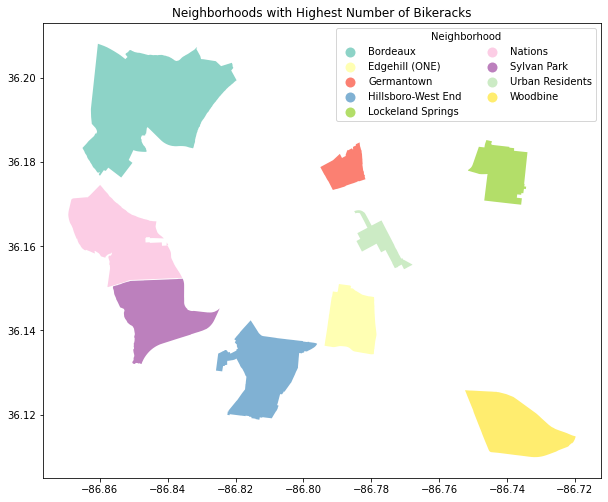

In [37]:
leg_kwds = {'title': 'Neighborhood', 'loc': 'best', 
            'bbox_to_anchor': (1, 1), 'ncol': 2}
fig, ax = plt.subplots(figsize = (10,10))
top_nhoods.plot(ax = ax, column = 'NAME', cmap = 'Set3', legend = True, 
                      legend_kwds = leg_kwds)
plt.title('Neighborhoods with Highest Number of Bikeracks')
plt.savefig('neighborhoods.png');